In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [30]:
df_tips = pd.read_csv("tips.csv")
df_tips.head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


#### 1. what is the average tip (as a percentage of meal cost) for for lunch and for dinner?

In [31]:
def avg_tip_meal(tip,t_bill):
    empty_array = np.empty([0,0])
    for i in range(len(tip)):
        empty_array = np.append(empty_array,[(round((tip[i] / t_bill[i]) * 100,2))])
        
    return empty_array

In [32]:
df_tips_copy = df_tips.copy()
df_tips_copy["tip_meal_%"] = avg_tip_meal(df_tips["tip"],df_tips["total_bill"])
df_tips_copy.head(5)

,total_bill,tip,sex,smoker,day,time,size,tip_meal_%
0,16.99,1.01,Female,No,Sun,Dinner,2,5.94
1,10.34,1.66,Male,No,Sun,Dinner,3,16.05
2,21.01,3.50,Male,No,Sun,Dinner,3,16.66
3,23.68,3.31,Male,No,Sun,Dinner,2,13.98
4,24.59,3.61,Female,No,Sun,Dinner,4,14.68


In [33]:
avg_lunch = np.mean(df_tips_copy[df_tips_copy["time"] == "Lunch"]["tip_meal_%"])
avg_dinner = np.mean(df_tips_copy[df_tips_copy["time"] == "Dinner"]["tip_meal_%"])

In [34]:
print(f"""
Average Tip - 
Lunch: {avg_lunch:.2f}%
Dinner: {avg_dinner:.2f}%
""")


Average Tip - 
Lunch: 16.41%
Dinner: 15.95%



#### 2. what is average tip for each day of the week (as a percentage of meal cost)?

In [35]:
daily_tips = df_tips_copy.groupby(["day"])["tip_meal_%"].mean().round(2)
daily_tips

day
Fri     16.99
Sat     15.31
Sun     16.69
Thur    16.13
Name: tip_meal_%, dtype: float64

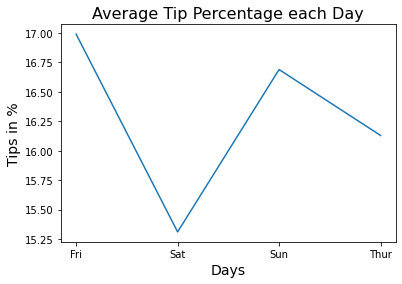

In [51]:
x_avg = daily_tips.index
y_avg = daily_tips.values
plt.plot(x_avg, y_avg)
plt.xlabel("Days",fontsize = 14)
plt.ylabel("Tips in %",fontsize = 14)
plt.title("Average Tip Percentage each Day",fontsize = 16)
plt.show()

#### 3. when are tips highest (which day and time)?

In [37]:
df_day_time = pd.DataFrame(df_tips_copy.groupby(["day","time"])["tip_meal_%"].mean().round(2))
df_day_time

tip_meal_%
day  time              
Fri  Dinner       15.89
     Lunch        18.88
Sat  Dinner       15.31
Sun  Dinner       16.69
Thur Dinner       15.97
     Lunch        16.13

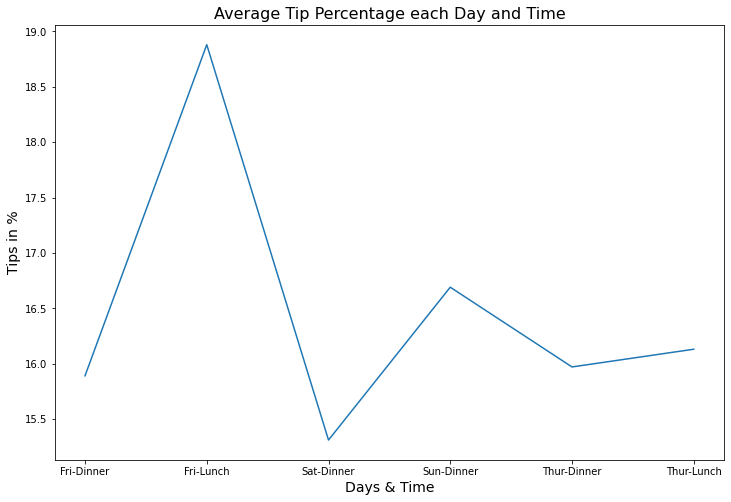

In [38]:
x2 = ["Fri-Dinner","Fri-Lunch","Sat-Dinner","Sun-Dinner","Thur-Dinner","Thur-Lunch"]
y2 = df_day_time.values
plt.figure(figsize=(12,8))
plt.plot(x2, y2)
plt.xlabel("Days & Time",fontsize = 14)
plt.ylabel("Tips in %",fontsize = 14)
plt.title("Average Tip Percentage each Day and Time",fontsize = 16)
plt.show()

* The tips are highest on **Friday** during **Lunch** time.

#### 4. compute the correlation between meal prices and tips

In [39]:
mp_tip_corr = df_tips["total_bill"].corr(df_tips["tip"])

print(f""" As our correlation is {mp_tip_corr:.2f} its a strong positve correlation""")

 As our correlation is 0.68 its a strong positve correlation


#### 5. is there any relationship between tips and size of the group?

In [40]:
grp_size_tip = df_tips_copy["size"].corr(df_tips_copy["tip_meal_%"])
print(f"As our correlation is {grp_size_tip:.2f} its a weak negative correlation")

As our correlation is -0.14 its a weak negative correlation


#### 6. what percentage of people are smoking?

In [41]:
smokers = df_tips.groupby(["smoker"])["size"].sum()[1] 
total_patrons = df_tips.groupby(["smoker"])["size"].sum()[1] + df_tips.groupby(["smoker"])["size"].sum()[0]
percent_smoker = round((smokers / total_patrons) * 100,2)
(f"""Percentage of Smokers: {percent_smoker}%""")

'Percentage of Smokers: 35.73%'

#### 7. assume that rows in the tips.csv file are arranged in time. Are tips increasing with time in each day?

In [57]:
def linn_regg(x1,y1):
    x = x1
    y = y1
    x_2 = x[:, np. newaxis ]
    
    lin_reg = LinearRegression ( fit_intercept = True )
    lin_reg.fit(x_2 , y)
    slope = lin_reg.coef_
    
    return slope

In [60]:
x_inr = np.array(df_tips_copy[:19].index)
y_inr = df_tips_copy[:19]["tip_meal_%"].values

slope1 = linn_regg(x_inr,y_inr)
slope1

array([0.34638596])

In [95]:
count = 0
lin_slope = dict()
count1 = 0

for i in range(len(df_tips_copy) - 1):
    if df_tips_copy.iloc[i]["day"] == df_tips_copy.iloc[i + 1]["day"]:
        continue
    else:
#         print(df_tips_copy[count:i + 1]["day"] + "\t")
        x_inr = np.array(df_tips_copy[count:i + 1].index)
        y_inr = df_tips_copy[count: i + 1]["tip_meal_%"].values
        
        key = df_tips_copy.iloc[i]["day"] + str(count1)
        count1 += 1

        lin_slope[key] = linn_regg(x_inr,y_inr)[0]
        count = i + 1
        
lin_slope


{'Sun0': 0.3463859649122807,
 'Sat1': -0.11937888198757761,
 'Sun2': 0.03696428571428574,
 'Sat3': 0.2015324675324676,
 'Thur4': 0.3146153846153846,
 'Fri5': 0.20458041958041953,
 'Sat6': 1.1149696969696972,
 'Sun7': 2.2430000000000003,
 'Thur8': 0.08722927807486631,
 'Sun9': -0.0021775025799793766,
 'Sat10': 1.5239999999999996,
 'Sun11': -0.9545789473684213,
 'Thur12': 0.09114285714285719,
 'Sat13': 0.21639560439560435,
 'Fri14': -0.9478571428571426,
 'Sat15': -0.5484117647058823}

* By looking at above data:
    * Sunday is mostly Positive
    * Saturday is mostly Positive
    * Thursday is mostly Positive
    * Friday is neutral nor positve or negative

#### 8. is there any difference in correlation between tip amounts from smokers and non-smokers?

In [42]:
sm_mp_tip_avg = df_tips[df_tips["smoker"] == "Yes"]["tip"].sum() / df_tips[df_tips["smoker"] == "Yes"]["size"].sum()
nsm_mp_tip_avg = df_tips[df_tips["smoker"] == "No"]["tip"].sum() / df_tips[df_tips["smoker"] == "No"]["size"].sum()

print(f""" 
Smokers average tip per person : ${sm_mp_tip_avg:.2f}
Non Smokers average tip per person : ${nsm_mp_tip_avg:.2f}
""")

 
Smokers average tip per person : $1.25
Non Smokers average tip per person : $1.12

